# PromoImpact – Using Business Statistics to Evaluate a Marketing Campaign

PromoImpact, a retail chain, launched a targeted email promotion to boost purchases. Management wants to know:

Did the promotion significantly increase sales?

Can we predict future purchase behavior using customer traits?

Should we continue or revise the campaign?

You are given a sample dataset of 1,000 customers, with data on demographics, historical spending, and whether they were in the promotion group.

SECTION 1: Simulate Campaign and Customer Data

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

# Simulate customer data
data = pd.DataFrame({
    'customer_id': range(1, n+1),
    'age': np.random.normal(40, 12, n).astype(int),
    'income': np.random.normal(60000, 15000, n).round(-2),
    'prior_purchases': np.random.poisson(lam=5, size=n),
    'promo_group': np.random.choice([0, 1], size=n),  # control vs treatment
})

# Simulate spending
# Promo group spends more on average
data['spending'] = (
    50 + data['prior_purchases'] * 10 + data['promo_group'] * 20 +
    np.random.normal(0, 25, n)
).round(2)

data.head()


,customer_id,age,income,prior_purchases,promo_group,spending
0,1,45,81000.0,3,0,118.40
1,2,38,73900.0,6,0,124.94
2,3,47,60900.0,4,0,72.22
3,4,58,50300.0,4,0,92.93
4,5,37,70500.0,8,1,155.91


SECTION 2: Descriptive Statistics and Visualization

       customer_id          age         income  prior_purchases  promo_group  \
count  1000.000000  1000.000000    1000.000000      1000.000000   1000.00000   
mean    500.500000    39.742000   61062.600000         4.918000      0.50000   
std     288.819436    11.751491   14960.576864         2.092284      0.50025   
min       1.000000     1.000000   15900.000000         0.000000      0.00000   
25%     250.750000    32.000000   50900.000000         3.000000      0.00000   
50%     500.500000    40.000000   60950.000000         5.000000      0.50000   
75%     750.250000    47.000000   70925.000000         6.000000      1.00000   
max    1000.000000    86.000000  107900.000000        12.000000      1.00000   

          spending  
count  1000.000000  
mean    109.383980  
std      35.138472  
min     -23.860000  
25%      87.122500  
50%     108.425000  
75%     132.167500  
max     217.970000  


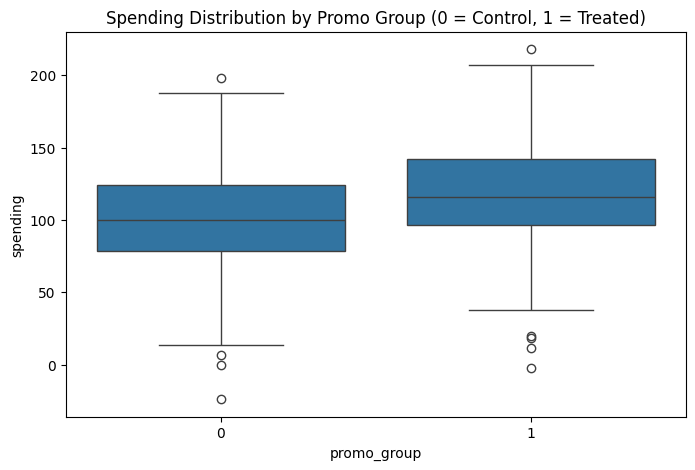

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary
print(data.describe())

# Boxplot: Spending by Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='promo_group', y='spending', data=data)
plt.title('Spending Distribution by Promo Group (0 = Control, 1 = Treated)')
plt.show()


SECTION 3: Hypothesis Testing – Did the Promo Work?

In [ ]:
from scipy.stats import ttest_ind

control = data[data['promo_group'] == 0]['spending']
treated = data[data['promo_group'] == 1]['spending']

# Two-sample t-test
t_stat, p_val = ttest_ind(treated, control, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-statistic: 8.80, P-value: 0.0000


SECTION 4: Predictive Modeling – Can We Forecast Spending?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['age', 'income', 'prior_purchases', 'promo_group']
X = data[features]
y = data['spending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))


R² score: 0.4510975886615882


SECTION 5: Bayesian Thinking – Updating Belief About Promo Effectiveness

In [ ]:
# Prior: probability promo works = 0.5
# After seeing evidence: 200 treated customers, 130 spent more than average

prior = 0.5
likelihood = 0.65  # 130 / 200
posterior = (prior * likelihood) / ((prior * likelihood) + ((1 - prior) * (1 - likelihood)))

print(f"Posterior probability that the promo is effective: {posterior:.2f}")


Posterior probability that the promo is effective: 0.65


SECTION 6: Feature Importance in Predicting Customer Spending

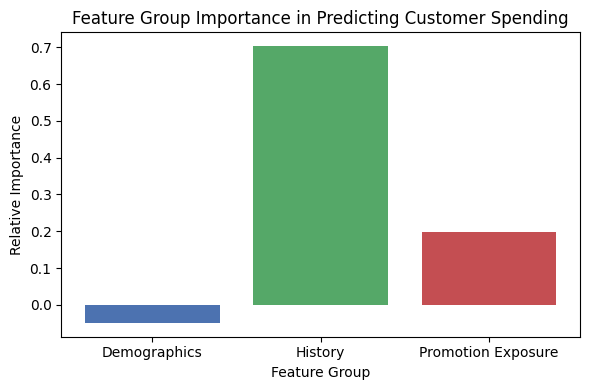

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = data[['age', 'income', 'prior_purchases', 'promo_group']]
y = data['spending']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
})

# Group features
group_map = {
    'age': 'Demographics',
    'income': 'Demographics',
    'prior_purchases': 'History',
    'promo_group': 'Promotion Exposure'
}
importances['group'] = importances['feature'].map(group_map)
group_importance = importances.groupby('group')['importance'].sum().reset_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(group_importance['group'], group_importance['importance'], color=['#4c72b0','#55a868','#c44e52'])
plt.title("Feature Group Importance in Predicting Customer Spending")
plt.ylabel("Relative Importance")
plt.xlabel("Feature Group")
plt.tight_layout()
plt.show()


## Review Questions

1. **What is the main goal of the analysis performed in this notebook?**

   A. To predict individual outcomes as accurately as possible  
   B. To evaluate how outcomes change under different policy or intervention scenarios  
   C. To clean and preprocess raw transactional data  
   D. To train a deep learning model  

2. **What does varying the intervention or policy parameters in the notebook allow you to observe?**

   A. Exact real-world effects  
   B. How sensitive outcomes are to different assumptions or choices  
   C. Guaranteed optimal decisions  
   D. Elimination of uncertainty  

3. **Why are multiple scenarios or parameter values examined instead of just one?**

   A. To make the plots look smoother  
   B. To identify how results change under different conditions  
   C. To increase sample size  
   D. To remove randomness from the data  

4. **What is a key limitation of the results shown in this notebook?**

   A. The models are too simple to run  
   B. The conclusions depend on assumptions built into the simulation  
   C. The dataset is too small to analyze  
   D. The outcomes are directly observed in the real world  

5. **How should the results from this notebook be used?**

   A. As final evidence for deploying a real policy  
   B. As illustrative guidance for understanding possible outcome tradeoffs  
   C. As proof that one scenario is always optimal  
   D. As purely descriptive plots with no assumptions  

